In [1]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect('../retail_sales.db')

# Quick test query
df = pd.read_sql_query('SELECT * FROM orders LIMIT 5;', conn)
df


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
1,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
2,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
3,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
4,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775


In [2]:
# Total Sales by Region
region_sales = pd.read_sql_query('''
SELECT Region, SUM(Sales) AS Total_Sales
FROM orders
GROUP BY Region
ORDER BY Total_Sales DESC;
''', conn)

region_sales


,Region,Total_Sales
0,West,710219.6845
1,East,669518.7260
2,Central,492646.9132
3,South,389151.4590
4,Region,0.0000


<Axes: title={'center': 'Total Sales by Region'}, xlabel='Region'>

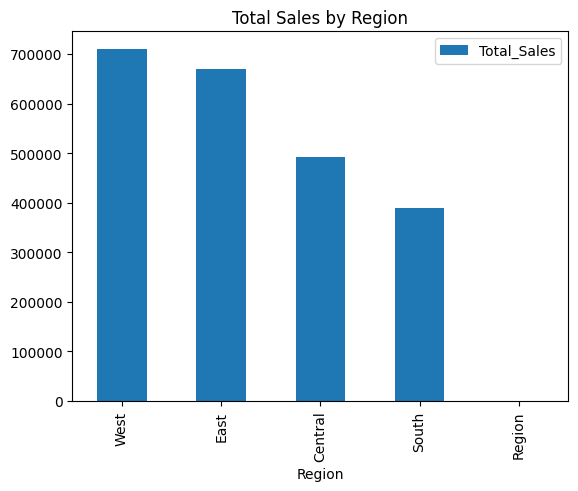

In [3]:
region_sales.plot(kind='bar', x='Region', y='Total_Sales', title='Total Sales by Region')


In [4]:
# Top 5 Customers by Sales
top_customers = pd.read_sql_query('''
SELECT Customer_Name, SUM(Sales) AS Total_Spent
FROM orders
GROUP BY Customer_Name
ORDER BY Total_Spent DESC
LIMIT 5;
''', conn)

top_customers


,Customer_Name,Total_Spent
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571


<Axes: title={'center': 'Top 5 Customers'}, xlabel='Customer_Name'>

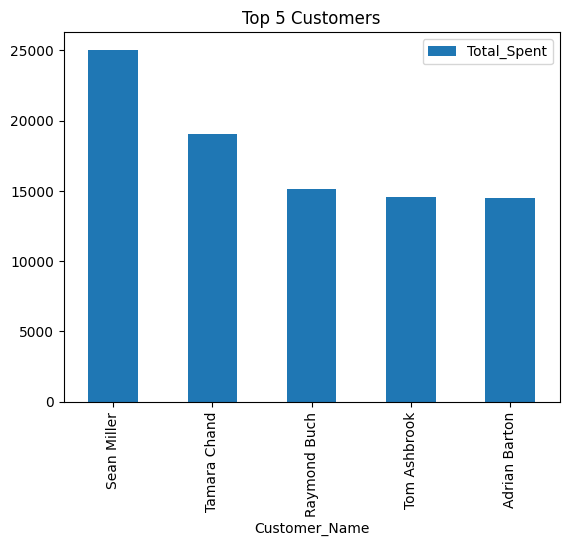

In [5]:
top_customers.plot(kind='bar', x='Customer_Name', y='Total_Spent', title='Top 5 Customers')


In [6]:
# Total Sales by Month
monthly_sales = pd.read_sql_query('''
SELECT 
  SUBSTR(Order_Date, 4, 2) AS Month,
  SUM(Sales) AS Total_Sales
FROM orders
GROUP BY Month
ORDER BY Month;
''', conn)

monthly_sales


,Month,Total_Sales
0,01,94291.6296
1,02,59371.1154
2,03,197573.5872
3,04,136283.0006
4,05,154086.7237
5,06,145837.5233
6,07,145535.6890
7,08,157315.9270
8,09,300103.4117
9,10,199496.2947


<Axes: title={'center': 'Total Sales by Month'}, xlabel='Month'>

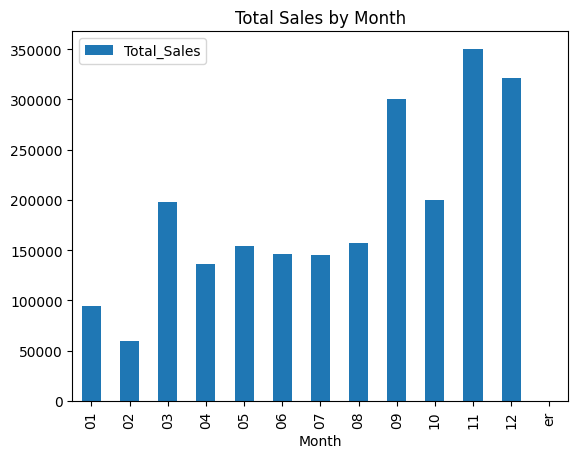

In [7]:
monthly_sales.plot(kind='bar', x='Month', y='Total_Sales', title='Total Sales by Month')
